<a href="https://colab.research.google.com/github/sarahgruetz/7DaysofCode-DataScience/blob/main/1_data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Cleaning

**Objetivo**: carregar e limpar os dados dos últimos 4 anos das despesas CEAPS. 

In [1]:
import pandas as pd
import numpy as np
from os import listdir
import matplotlib.pyplot as plt

Carregando os dados dos últimos 4 anos, de 2019 até 2022.

In [2]:
dfs = []
for year in [2019,2020,2021,2022]:
  url = f'https://www.senado.gov.br/transparencia/LAI/verba/despesa_ceaps_{year}.csv'
  dfs.append(pd.read_csv(url, sep = ';', header=1, encoding='latin-1'))

Concatenando os dados dos diferentes anos em um mesmo dataframe.

`ignore_index`: vai ignorar os indices originais e criar um novo para o dataframe concatenado.

In [3]:
df = pd.concat(dfs, ignore_index=True)
print(df.shape)
df.head()

(69231, 11)


,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
0,2019,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.914.650/0001-66,ENERGISA,006582758,04/01/2019,Despesa com pagamento de energia elétrica do e...,"66,02",2116543
1,2019,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.914.650/0001-66,ENERGISA,006582755,04/01/2019,Despesa com pagamento de energia elétrica do e...,"139,98",2116546
2,2019,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,00119,07/01/2019,Despesa com pagamento de aluguel de imóvel par...,6000,2113817
3,2019,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.423.963/0001-11,OI MÓVEL S.A.,86161151,25/12/2018,Despesa com pagamento de telefonia para o escr...,"316,39",2116541
4,2019,2,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.914.650/0001-66,ENERGISA,007236036,04/02/2019,Despesa com pagamento de energia elétrica para...,"99,45",2116550


Checando se existem registros duplicados.

In [4]:
df.duplicated().sum()

0

Checando se existem valores faltantes nas colunas.

In [5]:
df.isna().sum()

ANO                      0
MES                      0
SENADOR                  0
TIPO_DESPESA             0
CNPJ_CPF                 0
FORNECEDOR               0
DOCUMENTO             2962
DATA                     0
DETALHAMENTO         30687
VALOR_REEMBOLSADO        0
COD_DOCUMENTO            0
dtype: int64

Apenas as colunas `DOCUMENTO` e `DETALHAMENTO` possuem dados faltantes.

Informações sobre o documento e uma descrição mais detalhada dos gastos não serão úteis para a análise.

Vamos remover ambas as colunas e a coluna `COD_DOCUMENTO`

In [6]:
df.drop(columns=['DOCUMENTO','DETALHAMENTO','COD_DOCUMENTO'],inplace=True)

In [7]:
df.head()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DATA,VALOR_REEMBOLSADO
0,2019,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.914.650/0001-66,ENERGISA,04/01/2019,"66,02"
1,2019,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.914.650/0001-66,ENERGISA,04/01/2019,"139,98"
2,2019,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,07/01/2019,6000
3,2019,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.423.963/0001-11,OI MÓVEL S.A.,25/12/2018,"316,39"
4,2019,2,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.914.650/0001-66,ENERGISA,04/02/2019,"99,45"


Analisando o tipo das colunas.

In [8]:
df.dtypes

ANO                   int64
MES                   int64
SENADOR              object
TIPO_DESPESA         object
CNPJ_CPF             object
FORNECEDOR           object
DATA                 object
VALOR_REEMBOLSADO    object
dtype: object

O tipo de algumas colunas precisa ser corrigido.

As colunas `ANO` e `MES` deveriam ser do tipo `str` já que representam categorias e não necessáriamente valores numéricos que serão manipulados.

In [9]:
df['ANO'] = df['ANO'].astype('str')
df['MES'] = df['MES'].astype('str')

A coluna `DATA` precisa ser convertida para o tipo `datetime`.

In [10]:
df['DATA'] = pd.to_datetime(df['DATA'], dayfirst=True, utc=False, errors='coerce')

Não foi possível converter 3 registros da coluna `DATA` para `datetime`. 

In [11]:
df.isna().sum()

ANO                  0
MES                  0
SENADOR              0
TIPO_DESPESA         0
CNPJ_CPF             0
FORNECEDOR           0
DATA                 3
VALOR_REEMBOLSADO    0
dtype: int64

Removendo esses registros.

In [12]:
df.dropna(inplace=True)


A coluna `VALOR_REEMBOLSADO` precisa ser convertida para o tipo `float`.

Primeiro é preciso substituir a `,` pelo `.` como separador decimal.

In [13]:
df['VALOR_REEMBOLSADO'].replace(',', '.', regex=True, inplace=True)

In [14]:
df['VALOR_REEMBOLSADO'] = df['VALOR_REEMBOLSADO'].astype('float')

In [15]:
df.dtypes

ANO                          object
MES                          object
SENADOR                      object
TIPO_DESPESA                 object
CNPJ_CPF                     object
FORNECEDOR                   object
DATA                 datetime64[ns]
VALOR_REEMBOLSADO           float64
dtype: object

In [16]:
df.head()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DATA,VALOR_REEMBOLSADO
0,2019,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.914.650/0001-66,ENERGISA,2019-01-04,66.02
1,2019,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.914.650/0001-66,ENERGISA,2019-01-04,139.98
2,2019,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,2019-01-07,6000.00
3,2019,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.423.963/0001-11,OI MÓVEL S.A.,2018-12-25,316.39
4,2019,2,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.914.650/0001-66,ENERGISA,2019-02-04,99.45


Checando a existência de outliers no `VALOR_REEMBOLSADO`

In [17]:
df['VALOR_REEMBOLSADO'].describe([0.01, 0.25, 0.5, 0.75, 0.99])

count     69228.000000
mean       1413.012615
std        3099.695562
min           0.010000
1%           11.000000
25%         157.900000
50%         425.230000
75%        1570.390000
99%       14373.000000
max      120000.000000
Name: VALOR_REEMBOLSADO, dtype: float64

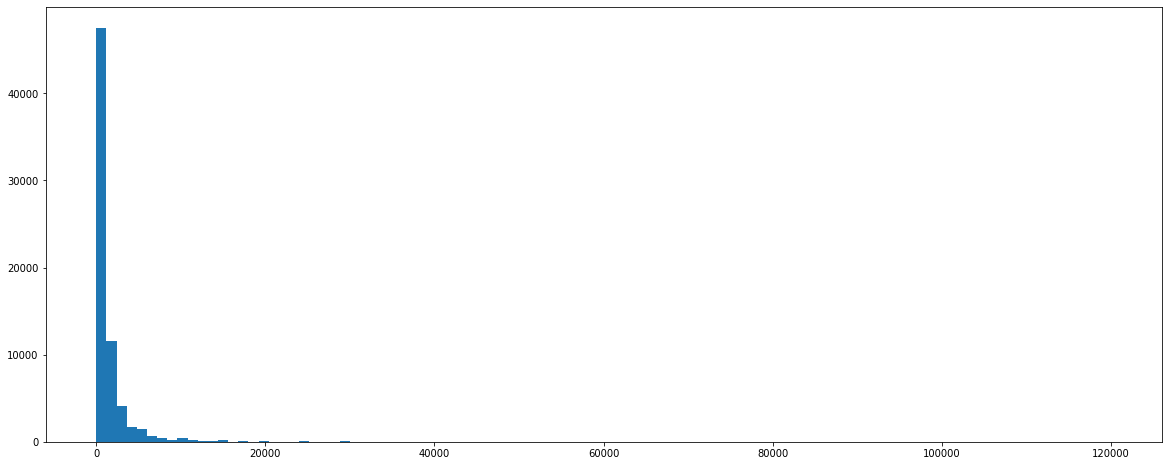

In [ ]:
plt.figure(figsize=(20,8))
plt.hist(df['VALOR_REEMBOLSADO'],bins=100)
plt.show()

Os dados de `VALOR_REEMBOLSADO` possuem uma assimetria positiva com valores bastante acima da média.

Por enquanto nenhum valor será removido.

Salvando os dados limpos em um arquivo.

In [18]:
df.to_csv('/content/drive/MyDrive/CEAPS/dados_limpos.csv')